# ПРАКТИКУМ: ОБУЧЕНИЕ БЕЗ УЧИТЕЛЯ

    Практические задания для самостоятельной работы

     Цели практикума:,
    "- Освоить основные алгоритмы кластеризации",
    "- Научиться применять методы снижения размерности",
    "- Освоить техники обнаружения аномалий",
    "- Развить навыки интерпретации результатов",
    "- Понять критерии оценки качества",
    Структура работы:

1. Подготовка данных и EDA
2. Кластеризация (K-Means, Hierarchical, DBSCAN)
3. Снижение размерности (PCA, t-SNE)
4. Обнаружение аномалий
5. Анализ и интерпретация результатов


## БЛОК 1: Импорт библиотек и настройка окружения

In [31]:
# Основные библиотеки для работы с данными
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Настройка визуализации
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

print("Основные библиотеки загружены")

Основные библиотеки загружены


In [32]:
# Библиотеки машинного обучения
from sklearn.datasets import make_blobs, make_circles, make_moons, load_wine, load_breast_cancer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split

# Алгоритмы кластеризации
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture

# Снижение размерности
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Обнаружение аномалий
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.neighbors import LocalOutlierFactor

# Метрики качества
from sklearn.metrics import silhouette_score, adjusted_rand_score, normalized_mutual_info_score
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score

# Иерархическая кластеризация
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.spatial.distance import pdist

print("Библиотеки машинного обучения загружены")

Библиотеки машинного обучения загружены


## БЛОК 2: Подготовка и исследование данных

In [33]:
from sklearn.datasets import load_wine
data = load_wine()
X_original = pd.DataFrame(data.data, columns=data.feature_names)
y_true = data.target
X_original.shape
X_original.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


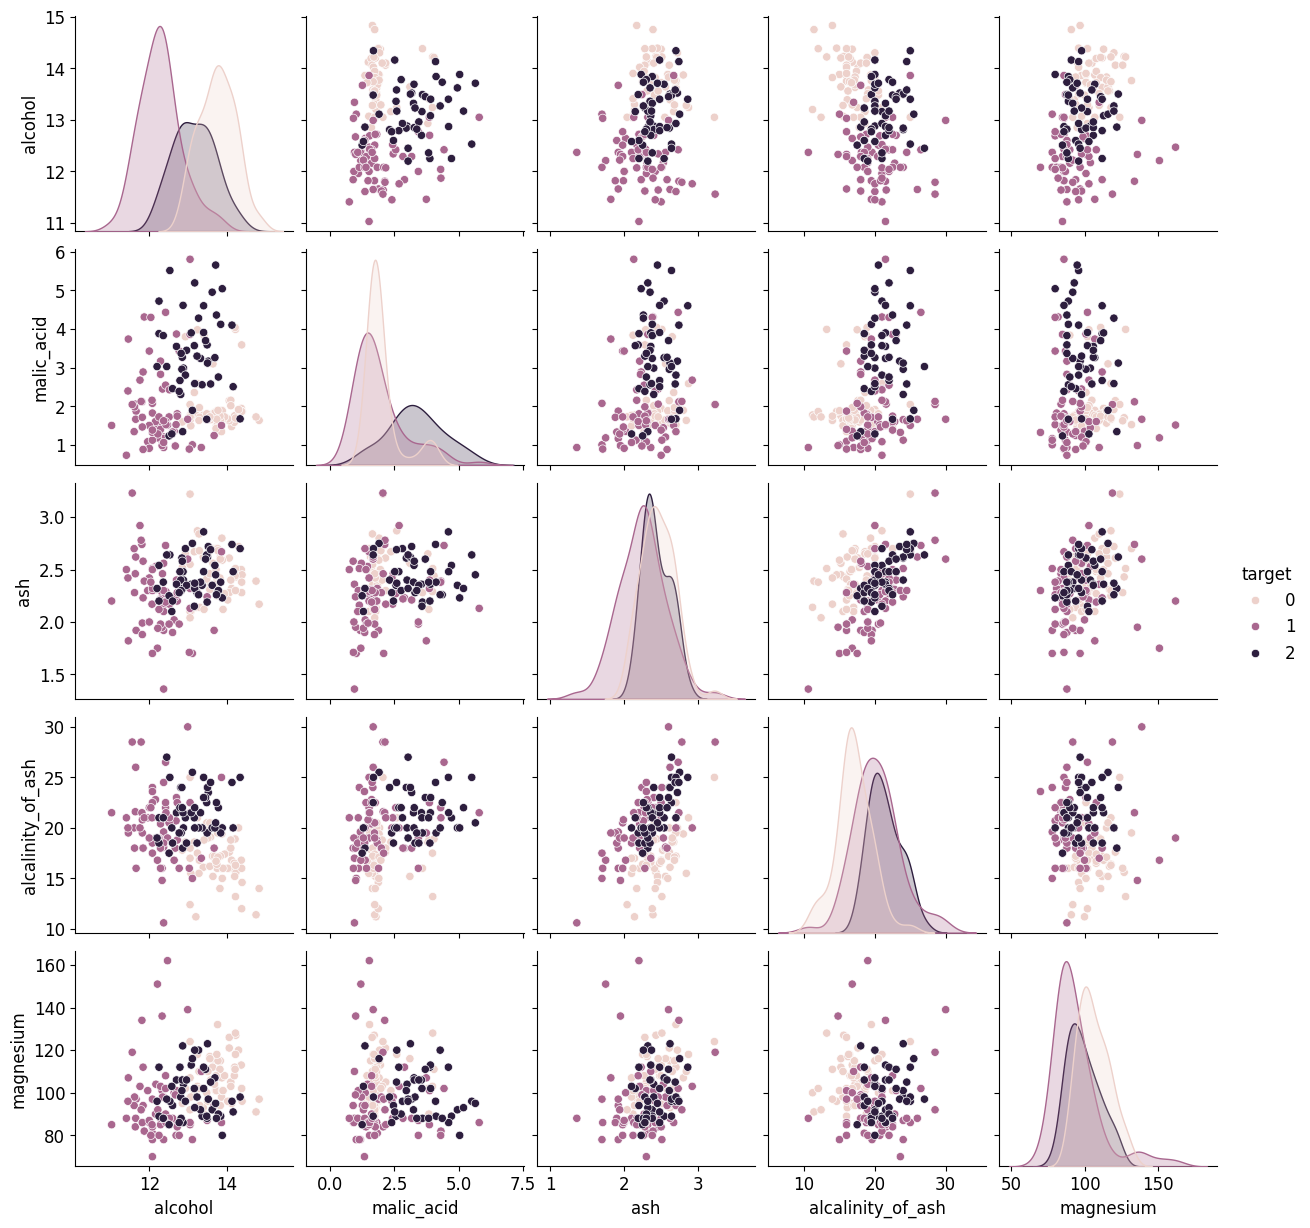

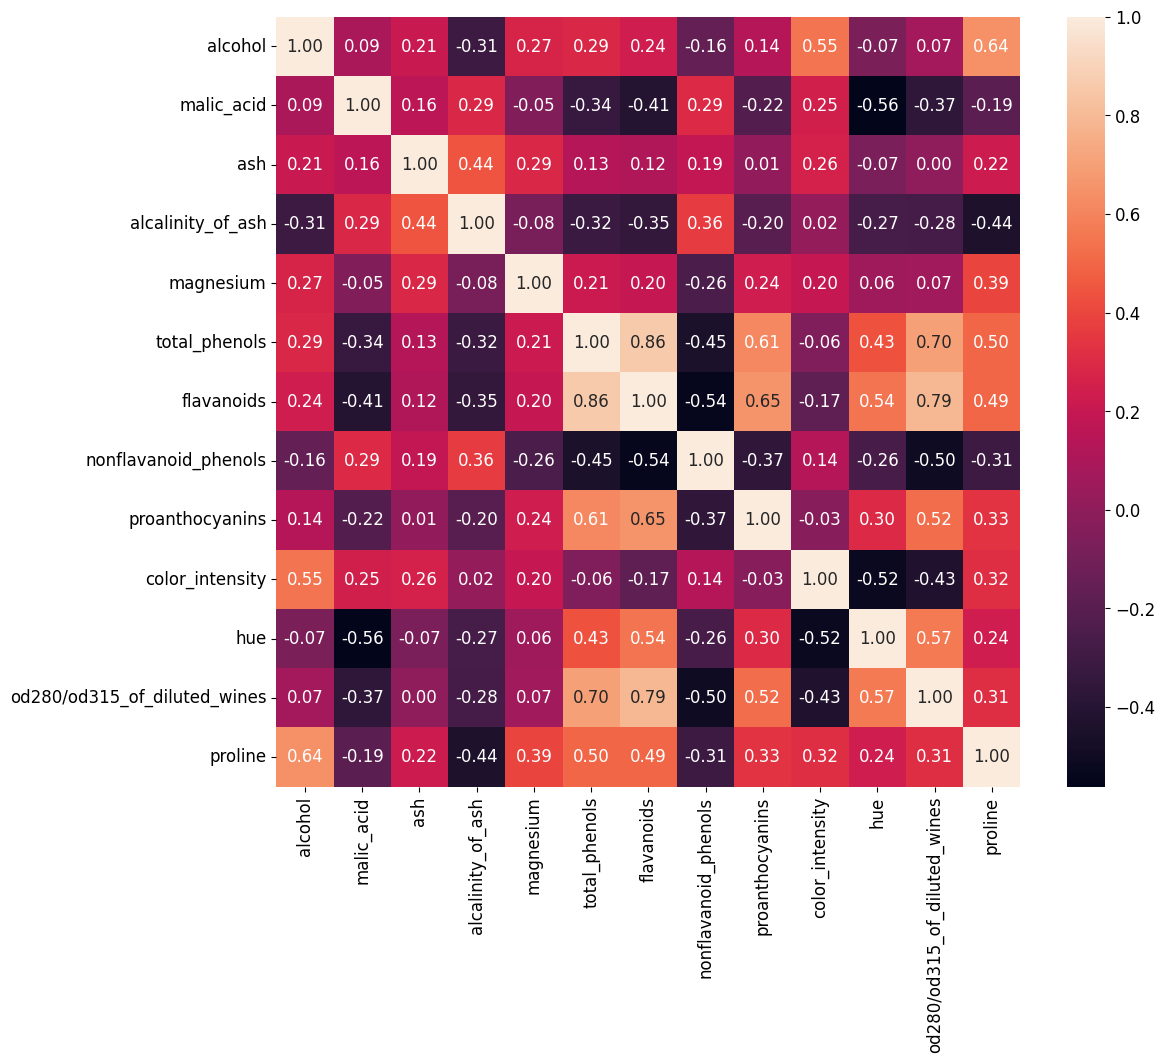

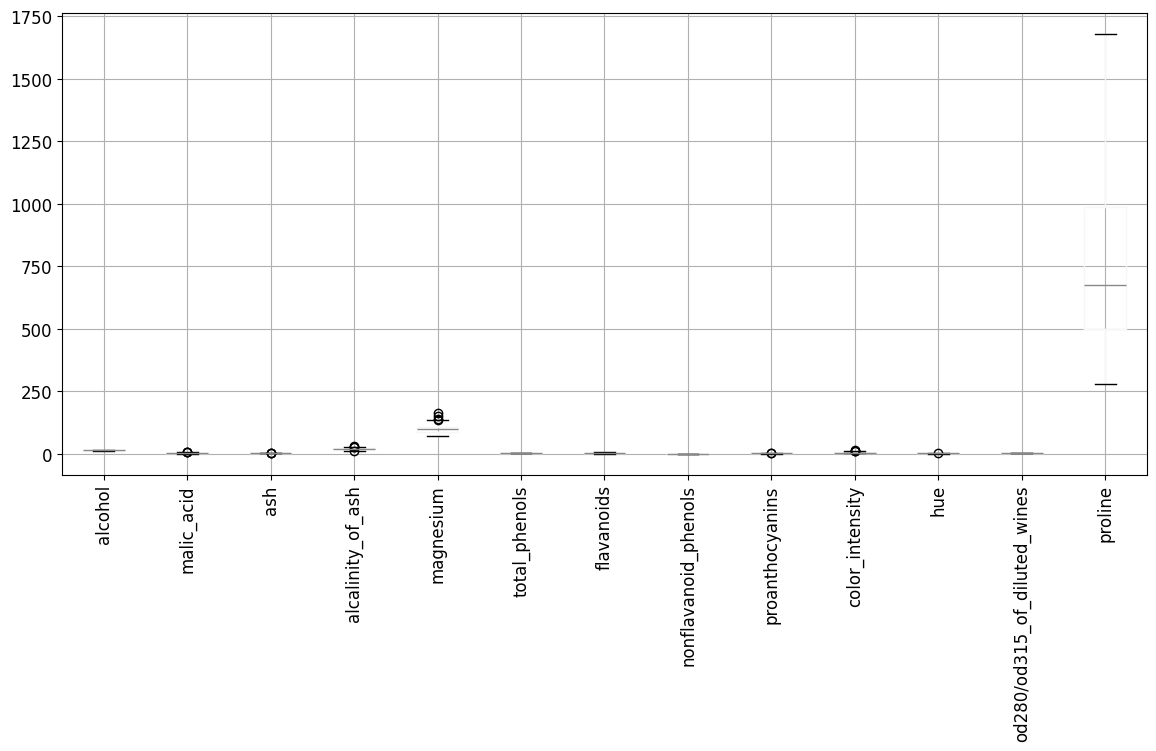

In [34]:
sns.pairplot(pd.concat([X_original.iloc[:, :5], pd.Series(y_true, name='target')], axis=1), hue='target')
plt.show()
plt.figure(figsize=(12,10))
sns.heatmap(X_original.corr(), annot=True, fmt='.2f')
plt.show()
plt.figure(figsize=(14,6))
X_original.boxplot(rot=90)
plt.show()

In [35]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_original)
X_scaled = pd.DataFrame(X_scaled, columns=X_original.columns)
X_original_df = X_original.copy()
X_scaled.shape

(178, 13)

## БЛОК 3: Кластеризация - K-Means

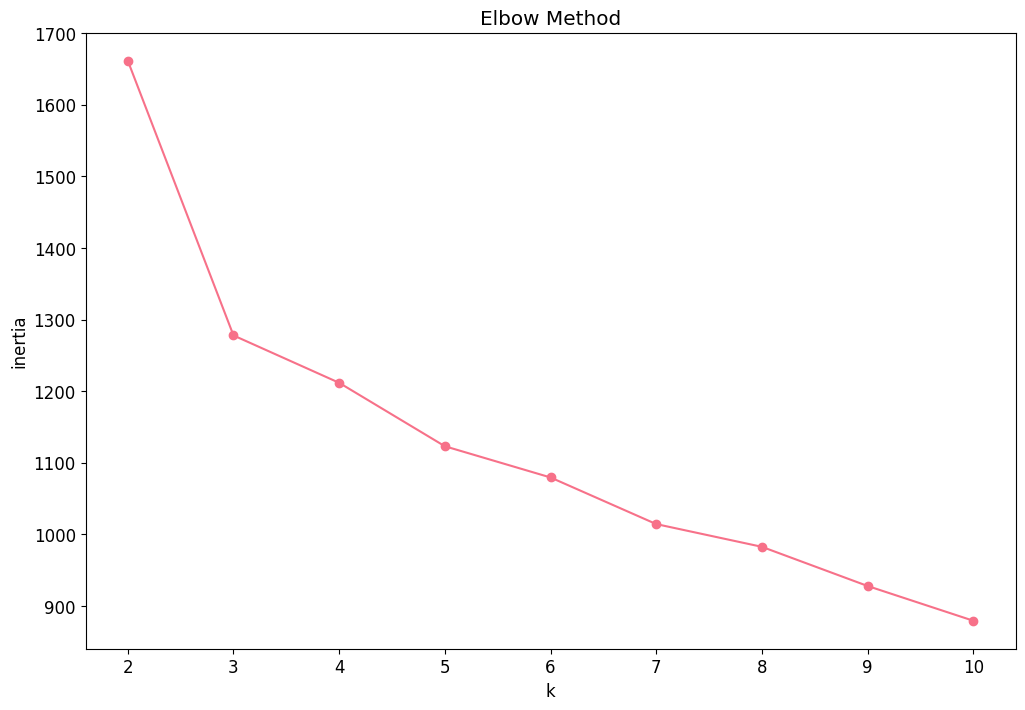

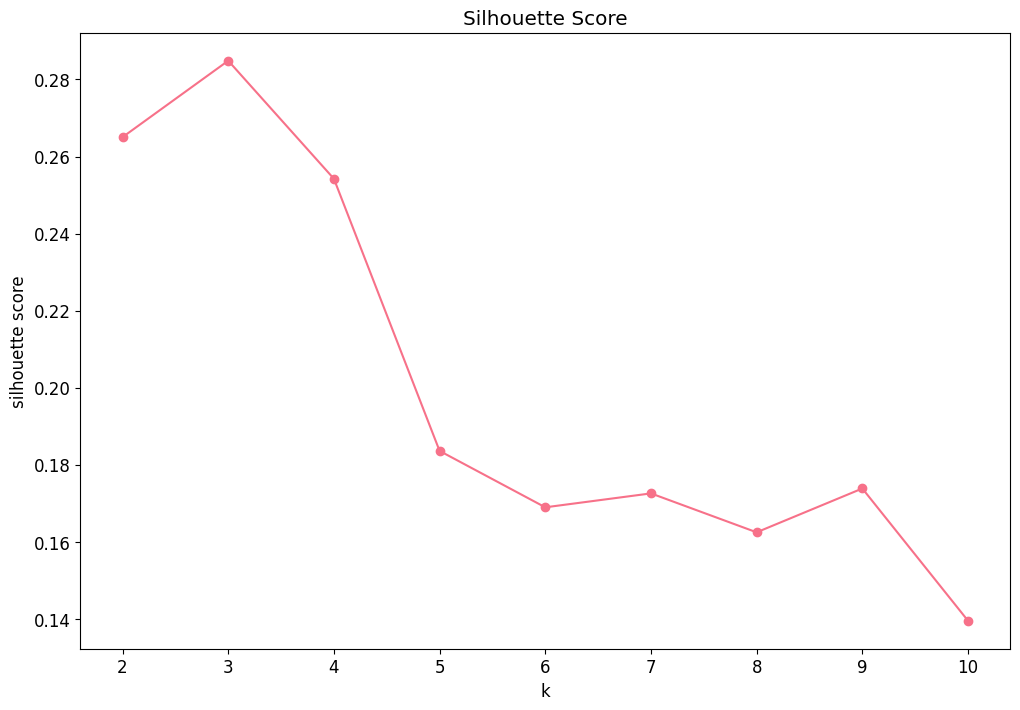

In [36]:
k_range = range(2,11)
inertias = []
sil_scores = []
for k in k_range:
    model = KMeans(n_clusters=k, random_state=42)
    labels = model.fit_predict(X_scaled)
    inertias.append(model.inertia_)
    sil_scores.append(silhouette_score(X_scaled, labels))
plt.figure()
plt.plot(list(k_range), inertias, marker='o')
plt.xlabel('k')
plt.ylabel('inertia')
plt.title('Elbow Method')
plt.show()
plt.figure()
plt.plot(list(k_range), sil_scores, marker='o')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.title('Silhouette Score')
plt.show()

In [37]:
k_opt = 3
kmeans = KMeans(n_clusters=k_opt, random_state=42)
labels_km = kmeans.fit_predict(X_scaled)
centroids = kmeans.cluster_centers_
metrics_km = {
    'silhouette': silhouette_score(X_scaled, labels_km),
    'calinski_harabasz': calinski_harabasz_score(X_scaled, labels_km),
    'davies_bouldin': davies_bouldin_score(X_scaled, labels_km),
    'ari': adjusted_rand_score(y_true, labels_km)
}
metrics_km

{'silhouette': 0.2848589191898987,
 'calinski_harabasz': 70.9400080031512,
 'davies_bouldin': 1.3891879777181646,
 'ari': 0.8974949815093207}

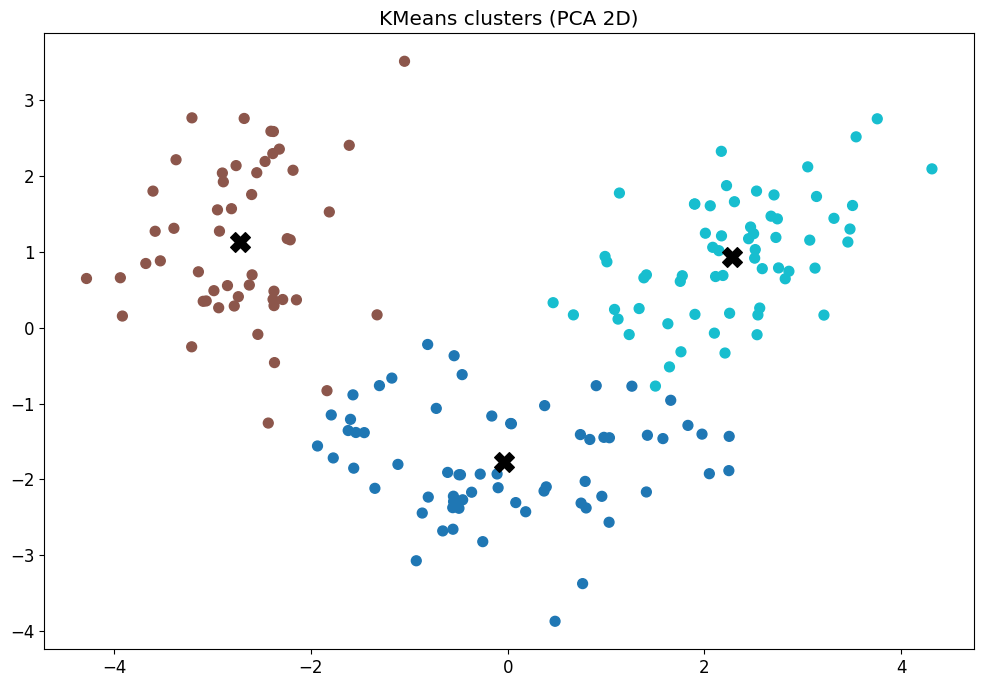

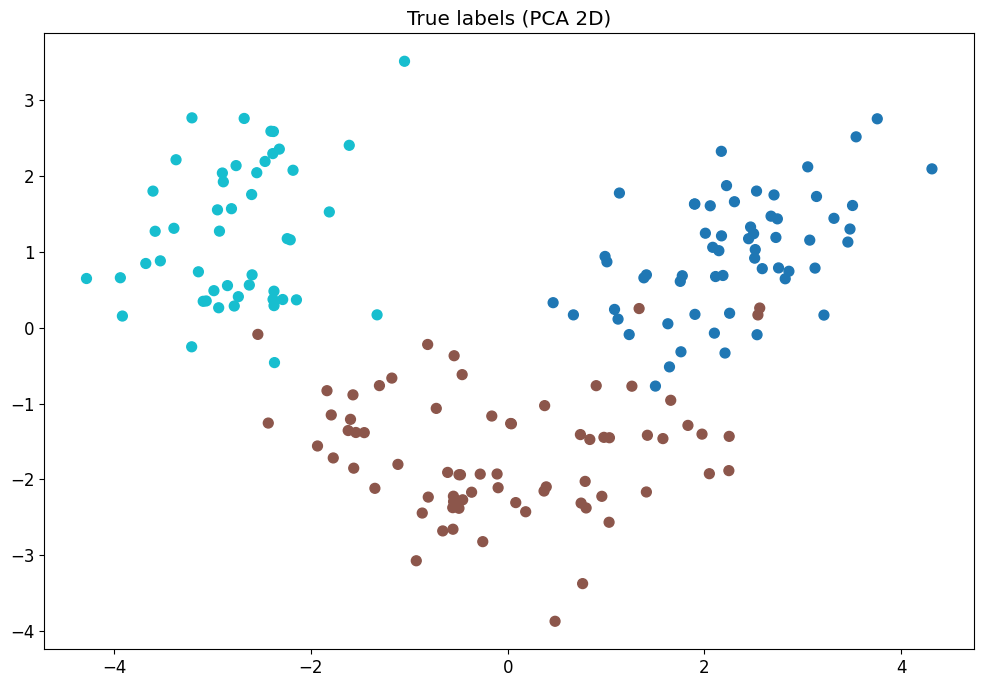

In [38]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
centroids_pca = pca.transform(centroids)
plt.figure()
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels_km, cmap='tab10', s=50)
plt.scatter(centroids_pca[:,0], centroids_pca[:,1], c='black', s=200, marker='X')
plt.title('KMeans clusters (PCA 2D)')
plt.show()
plt.figure()
plt.scatter(X_pca[:,0], X_pca[:,1], c=y_true, cmap='tab10', s=50)
plt.title('True labels (PCA 2D)')
plt.show()

## БЛОК 4: Иерархическая кластеризация

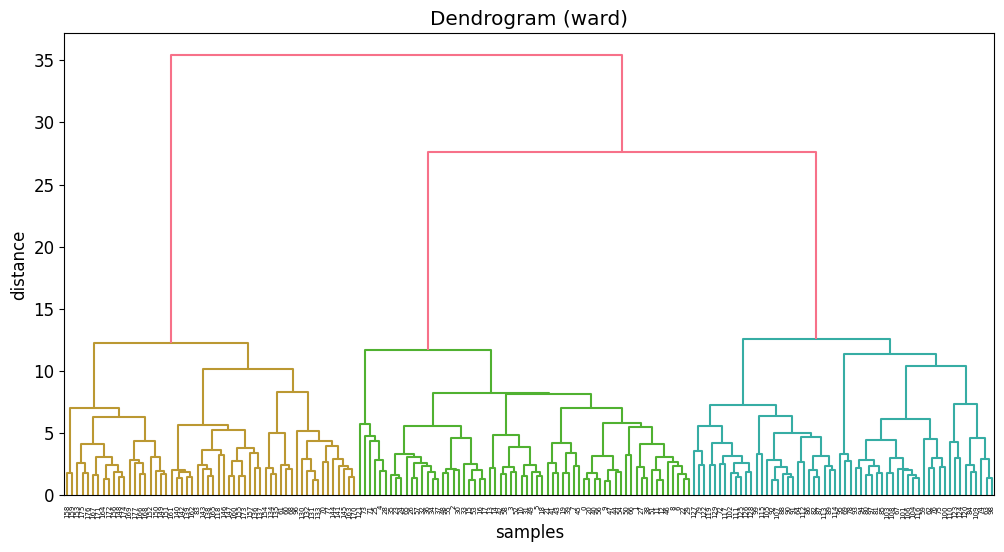

(3,)

In [39]:
Z = linkage(X_scaled, method='ward')
plt.figure(figsize=(12,6))
dendrogram(Z, truncate_mode='level', p=30)
plt.title('Dendrogram (ward)')
plt.xlabel('samples')
plt.ylabel('distance')
plt.show()
clusters_h = fcluster(Z, 3, criterion='maxclust')
np.unique(clusters_h).shape

In [40]:
methods = ['ward','complete','average','single']
results = []
for m in methods:
    if m == 'ward':
        model = AgglomerativeClustering(n_clusters=3, linkage=m)
    else:
        model = AgglomerativeClustering(n_clusters=3, linkage=m)
    labels = model.fit_predict(X_scaled)
    results.append({'method':m, 'silhouette': silhouette_score(X_scaled, labels)})
pd.DataFrame(results).sort_values('silhouette', ascending=False)

,method,silhouette
0,ward,0.277444
1,complete,0.203787
3,single,0.182738
2,average,0.157525


## БЛОК 5: DBSCAN - плотностная кластеризация

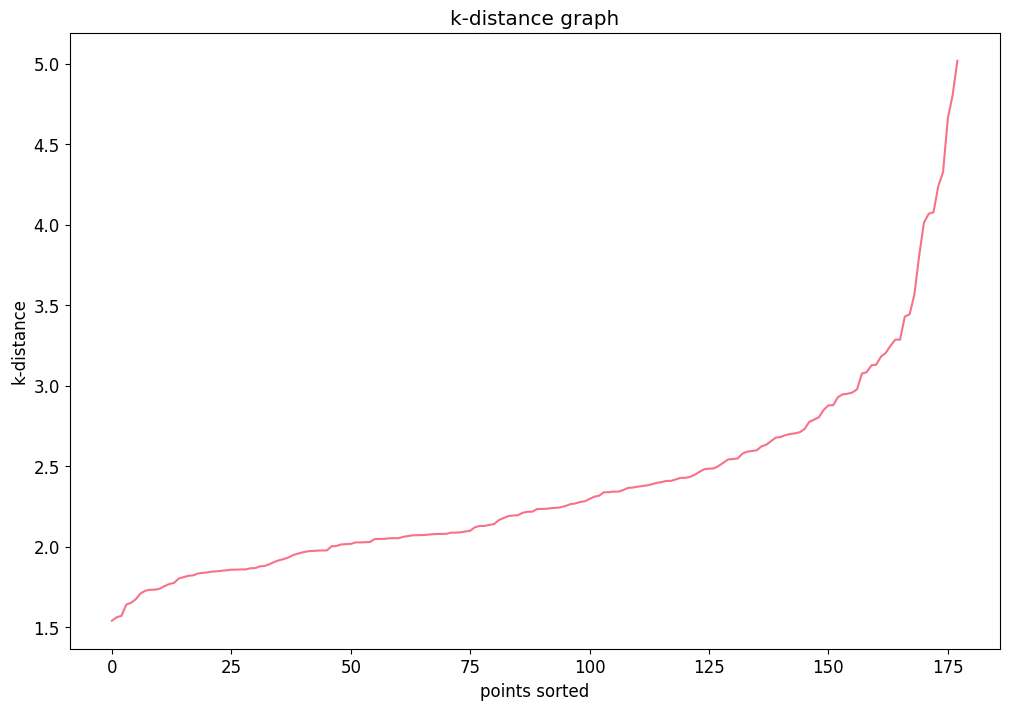

In [41]:
from sklearn.neighbors import NearestNeighbors
nbrs = NearestNeighbors(n_neighbors=5).fit(X_scaled)
distances, indices = nbrs.kneighbors(X_scaled)
k_distances = np.sort(distances[:, -1])
plt.figure()
plt.plot(k_distances)
plt.ylabel('k-distance')
plt.xlabel('points sorted')
plt.title('k-distance graph')
plt.show()

In [42]:
db = DBSCAN(eps=0.6, min_samples=5)
labels_db = db.fit_predict(X_scaled)
n_clusters = len(set(labels_db)) - (1 if -1 in labels_db else 0)
n_noise = list(labels_db).count(-1)
cluster_sizes = pd.Series(labels_db).value_counts()
{'n_clusters': n_clusters, 'n_noise': n_noise, 'cluster_sizes': cluster_sizes.to_dict()}

{'n_clusters': 0, 'n_noise': 178, 'cluster_sizes': {-1: 178}}

## БЛОК 6: Снижение размерности

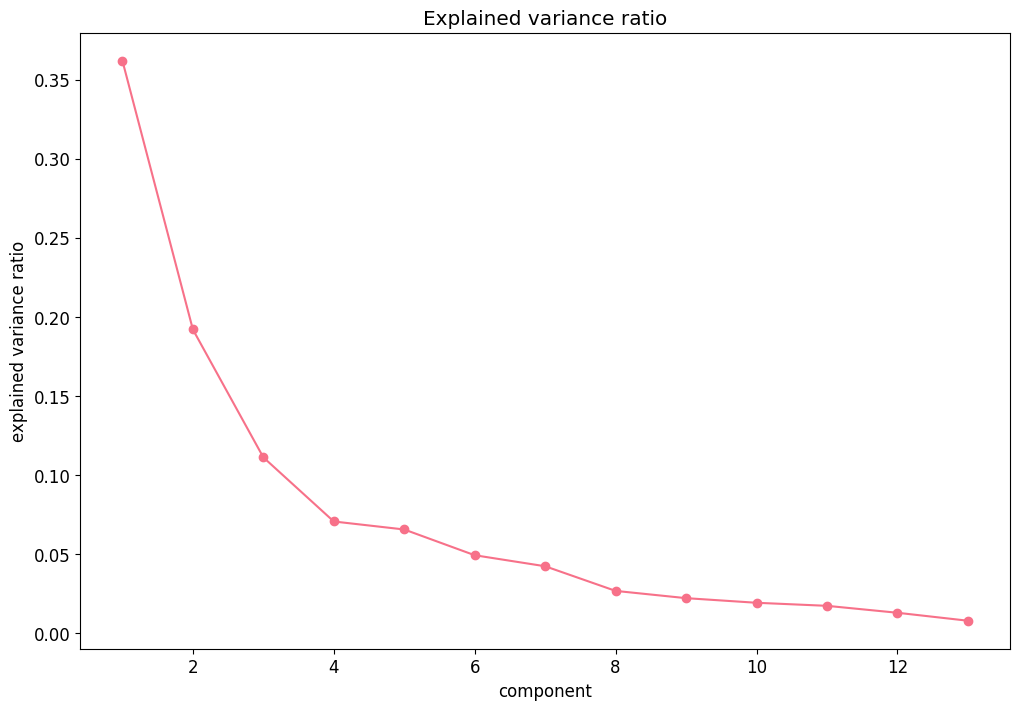

10

In [43]:
pca_full = PCA()
pca_full.fit(X_scaled)
explained = pca_full.explained_variance_ratio_
cum_explained = np.cumsum(explained)
n_components_95 = int(np.searchsorted(cum_explained, 0.95) + 1)
plt.figure()
plt.plot(np.arange(1, len(explained)+1), explained, marker='o')
plt.xlabel('component')
plt.ylabel('explained variance ratio')
plt.title('Explained variance ratio')
plt.show()
n_components_95

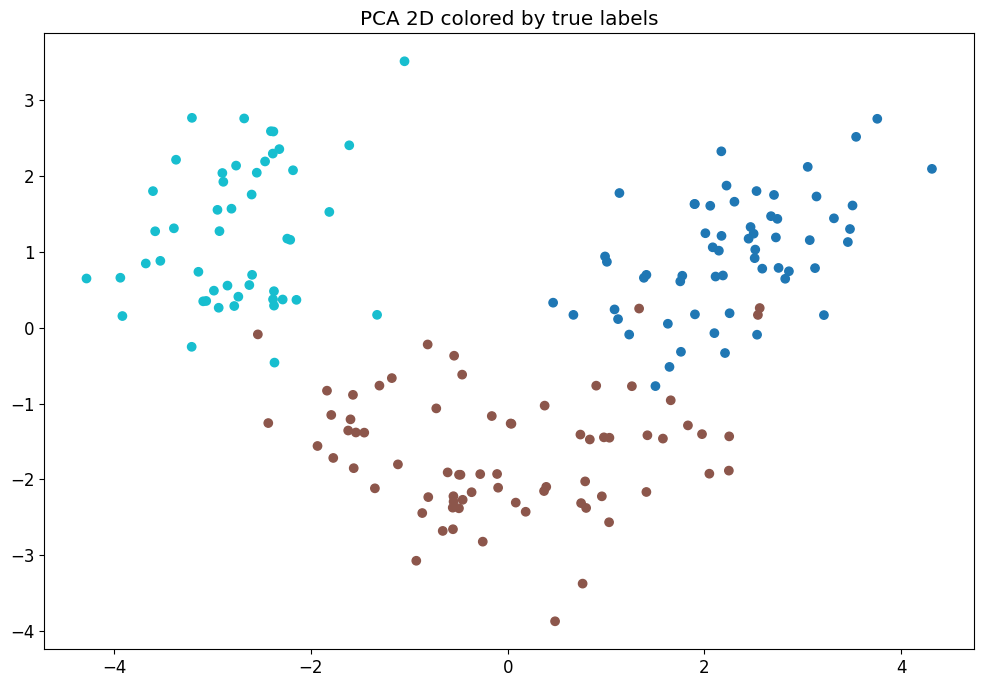

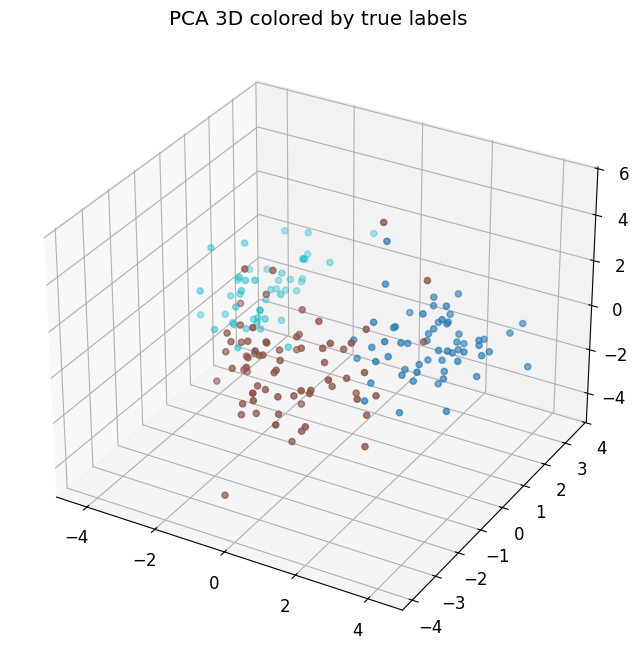

In [44]:
pca2 = PCA(n_components=2)
X_pca2 = pca2.fit_transform(X_scaled)
plt.figure()
plt.scatter(X_pca2[:,0], X_pca2[:,1], c=y_true, cmap='tab10')
plt.title('PCA 2D colored by true labels')
plt.show()
from mpl_toolkits.mplot3d import Axes3D
pca3 = PCA(n_components=3)
X_pca3 = pca3.fit_transform(X_scaled)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca3[:,0], X_pca3[:,1], X_pca3[:,2], c=y_true, cmap='tab10')
ax.set_title('PCA 3D colored by true labels')
plt.show()

In [ ]:
X_tsne = TSNE(n_components=2, random_state=42, perplexity=30).fit_transform(X_scaled)
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.scatter(X_pca[:,0], X_pca[:,1], c=y_true, cmap='tab10')
plt.title('PCA 2D')
plt.subplot(1,2,2)
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=y_true, cmap='tab10')
plt.title('t-SNE 2D')
plt.show()

## БЛОК 7: Обнаружение аномалий

In [ ]:
rng = np.random.RandomState(42)
n_anom = 15
anoms = X_original_df.mean().values + rng.randn(n_anom, X_original_df.shape[1]) * X_original_df.std().values * 8
X_with = np.vstack([X_original_df.values, anoms])
y_with = np.hstack([np.ones(len(X_original_df)), -1*np.ones(len(anoms))])
X_with_scaled = scaler.transform(X_with)
X_with_pca = PCA(n_components=2).fit_transform(X_with_scaled)
plt.figure(figsize=(8,6))
plt.scatter(X_with_pca[:-n_anom,0], X_with_pca[:-n_anom,1], c='C0', label='normal')
plt.scatter(X_with_pca[-n_anom:,0], X_with_pca[-n_anom:,1], c='C3', label='anomaly')
plt.legend()
plt.title('Data with injected anomalies (PCA 2D)')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
contamination = n_anom / X_with.shape[0]
iso = IsolationForest(contamination=contamination, random_state=42).fit(X_with_scaled)
pred_iso = iso.predict(X_with_scaled)
svm = OneClassSVM(nu=contamination, kernel='rbf', gamma='scale').fit(X_with_scaled)
pred_svm = svm.predict(X_with_scaled)
lof = LocalOutlierFactor(n_neighbors=20, contamination=contamination)
pred_lof = lof.fit_predict(X_with_scaled)
results_out = []
for name, pred in [('IsolationForest', pred_iso), ('OneClassSVM', pred_svm), ('LOF', pred_lof)]:
    results_out.append({
        'method': name,
        'accuracy': accuracy_score(y_with, pred),
        'precision': precision_score(y_with, pred, pos_label=-1),
        'recall': recall_score(y_with, pred, pos_label=-1)
    })
pd.DataFrame(results_out)

## БЛОК 8: Комплексный анализ и интерпретация

In [ ]:
rows = []
rows.append({'method':'KMeans','silhouette': metrics_km['silhouette'], 'ARI': metrics_km['ari']})
try:
    db_sil = silhouette_score(X_scaled, labels_db) if len(set(labels_db)) - (1 if -1 in labels_db else 0) > 1 else np.nan
except:
    db_sil = np.nan
rows.append({'method':'DBSCAN','silhouette': db_sil, 'ARI': np.nan})
agg_df = pd.DataFrame(results) if 'results' in globals() else pd.DataFrame()
best_agg = agg_df.sort_values('silhouette', ascending=False).head(1)
if not best_agg.empty:
    rows.append({'method':'Agglomerative('+best_agg.iloc[0].method+')','silhouette': best_agg.iloc[0].silhouette, 'ARI': np.nan})
summary_df = pd.DataFrame(rows)
summary_df

In [ ]:
cluster_profiles = X_original_df.copy()
cluster_profiles['cluster'] = labels_km
profile = cluster_profiles.groupby('cluster').mean()
plt.figure(figsize=(12,6))
sns.heatmap(profile.T, cmap='viridis')
plt.title('Cluster profiles (feature means)')
plt.show()
profile